In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color = purple> Sentiment Analysis of Jigsaw Academy Google reviews
<font color = purple>   AIM >>  Here our aim is make a sentiment analysis model that can be used to classifiy reviews into positive or negative sentiment based on the reviews.

In [6]:
# Read in the data
df = pd.read_csv(r'/content/Jigsawreviews.csv')
df.head()

,author_title,review_text,review_rating
0,Mintu Jakhar,I usually check reviews before making the deci...,4
1,Shreyasi Mahurkar,I was enrolled in Integrated Program in Busine...,5
2,Revathy P,"I did a Data Analytics program from Jigsaw, re...",5
3,Shaik Ahmed,I found the Business Analytics course very int...,5
4,Kartik Jain,"Hi All,\n\nI've been part of the IPBA batch (B...",5


In [7]:
print('shape of data', df.shape)

shape of data (500, 3)


In [8]:
# Checking for null values
df.isnull().sum()

author_title     0
review_text      0
review_rating    0
dtype: int64

### <font color = brown > EDA

Frequency of ratings


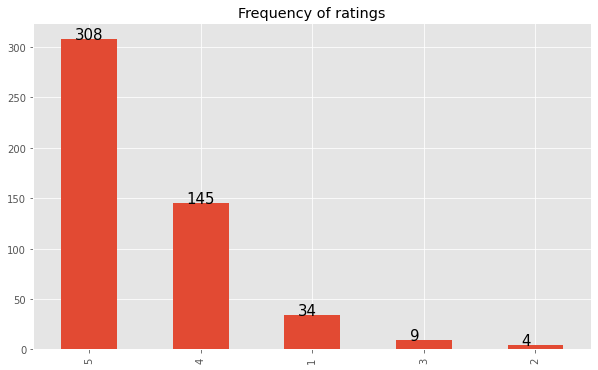

In [9]:
print('Frequency of ratings')
plt.figure(figsize = (10, 6))
plots = df['review_rating'].value_counts().plot(kind = 'bar');
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                  (bar.get_x() + bar.get_width()/4, bar.get_height()),
                   size = 15)
plt.title('Frequency of ratings');


<font color = olive>**Observation**: ***From here we can see that the people giving 5 rating is very high. And the people giving rating as 2 is the least. So we can see that the most of the people are satisfied with the academy but still some are not happy with the institute.***

### <font color = brown > Basic NLTK

In [10]:
example = df['review_text'][12]
print(example)

Took Full stack data science course: I had a great experience with Jigsaw Academy as there way of teaching and making it interactive for online classes is really nice. Got to learn alot from the course and the trainers were very soft spoken and knowledgeable.


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
# TOkenizing the 
tokens = nltk.word_tokenize(example)
tokens[:10]

['Took', 'Full', 'stack', 'data', 'science', 'course', ':', 'I', 'had', 'a']

In [13]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
print('Looking at parts of speech of tokenised words')
tagged = nltk.pos_tag(tokens)
tagged[:11]

Looking at parts of speech of tokenised words


[('Took', 'NNP'),
 ('Full', 'NNP'),
 ('stack', 'NN'),
 ('data', 'NNS'),
 ('science', 'NN'),
 ('course', 'NN'),
 (':', ':'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('a', 'DT'),
 ('great', 'JJ')]

In [15]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

<font color = black > Basic NLTK   We will use NLTK's to get neg/ neutral/ positive scores form the text.
- <font color = black > **This used "bag of words" approach:**
    1. Stop words are removed 
    2. Each word is scored and combined to a total score.

<font color = olive > Note: We will apply Vader model and see the performance for this model.

In [16]:
## Downloading vader model
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
## importing models
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [18]:
## Creating object of model
sia = SentimentIntensityAnalyzer()

In [19]:
# Lets see an example of how it works.
sia.polarity_scores('I am very happy.')

{'compound': 0.6115, 'neg': 0.0, 'neu': 0.334, 'pos': 0.666}

In [20]:
# Lets take a negative text.
sia.polarity_scores('This is worst of all.')

{'compound': -0.6249, 'neg': 0.506, 'neu': 0.494, 'pos': 0.0}

<font color = brown>**Lets apply it to our actual review from the text data.**

In [21]:
# Lets apply this to our actual review and see the result
print(example)
sia.polarity_scores(example)

Took Full stack data science course: I had a great experience with Jigsaw Academy as there way of teaching and making it interactive for online classes is really nice. Got to learn alot from the course and the trainers were very soft spoken and knowledgeable.


{'compound': 0.8016, 'neg': 0.0, 'neu': 0.851, 'pos': 0.149}

<font color = olive>**Observation**: ***So we can see that the compund score of the review is 0.8 which is a positive sentiment. And by reading the review also we can see that the student is accually happy from the academy.***

### <font color = maroon > Applying it to all the reviews.

In [22]:
# Applying this to all the riveuws
df1 = df.copy()

df1['VADER Polarity'] = df1['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df1.head()

,author_title,review_text,review_rating,VADER Polarity
0,Mintu Jakhar,I usually check reviews before making the deci...,4,0.9871
1,Shreyasi Mahurkar,I was enrolled in Integrated Program in Busine...,5,0.9851
2,Revathy P,"I did a Data Analytics program from Jigsaw, re...",5,0.9272
3,Shaik Ahmed,I found the Business Analytics course very int...,5,0.9500
4,Kartik Jain,"Hi All,\n\nI've been part of the IPBA batch (B...",5,0.9819


In [23]:
## Checking the tail records 
df1.tail()

,author_title,review_text,review_rating,VADER Polarity
495,Anshuman Sharma,The overall experience was good and satisfacto...,4,0.8402
496,Tunku Basu Majumdar,I would like to know about the process of how ...,3,0.5719
497,Rama Krishna,Good place for the beginners in data science. ...,4,0.6808
498,Bhamidipati Lakshminarayana,Not good for experienced people. Placement ass...,2,-0.3412
499,Mukesh Gupta,"""Excellent Experience and service."" It has bee...",5,0.8126


<font color = olive>**Observation**: ***So we can see that results that we are getting with the Vader polarity is good and accurate.***

<font color = brown>***Lets visualize how the compound score is with respect to ratings.***

Text(0.5, 1.0, 'Vader polarity score vs rating')

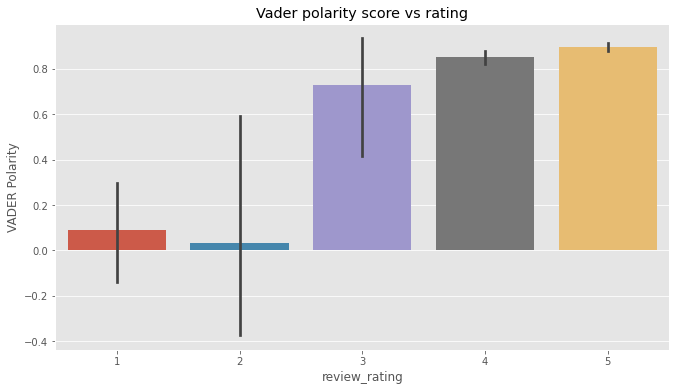

In [24]:
plt.figure(figsize = (11, 6))
ax = sns.barplot(data = df1, x = df1['review_rating'], y = df1['VADER Polarity'])
plt.title('Vader polarity score vs rating')

<font color = olive>**Observation**: *So we can see for rating less than three the VADER Polarity score is also very less. As these are negative review. So we can say that VAder is performaing quite good. Now lets see the evaluation of model.*

### <font color = maroon > Evaluation of Vader

In [25]:
## Substituting Polarity score of greater than 0 with 1 which will represnt it is positive score.
# And substiting Polarity score less than 0 with 0 with will represnts negative score.

pred = np.where(df1['VADER Polarity']> 0, 1, 0)
df1['predicted sentiment'] = pred

In [26]:
# Substituting rating above 2 as 1 which will repreenst positive review.
# Substituting rating below 3 as 0 which will represnts negative review.
actual = np.where(df1['review_rating']>2, 1, 0)
df1['actual sentiment'] = actual

In [27]:
## classification report of Vader model
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.86      0.47      0.61        38
           1       0.96      0.99      0.98       462

    accuracy                           0.95       500
   macro avg       0.91      0.73      0.79       500
weighted avg       0.95      0.95      0.95       500



<font color = olive>- So from the classification report above we can see that the recall for negative revies is very low which means that the Vader model is not able to classify negative reviews properly. So we shall make some other model.

In [28]:
# Checking the Vader model for some random review in thr dataset
example2 = df1[df1['review_rating']< 3].iloc[7]['review_text']
example2

'Very poor service,along with me and my friends registered this course of more then 50k INR but not worth to join specially who want to know the in and out of big data and data science. There are other good training institute like Coursera, simplylearn would be better then this program style. I`d not recommend this course for fresher who simple need more package to switch their career to analytics, secondly its not worth joining for working professional who are expecting to freeze their course in  between as Jigsaw only gives self learning video once you are out of continuous session series out from your assign batch. The video access is not a life time, you have to pay for the videos once your course duration is expire, Be aware!'

In [ ]:
# Compounf score that we got for the review
sia.polarity_scores(example2)['compound']

0.6429

<font color = olive>**Observation**: 
- For the example2 in the above cell even though the score review is actually negative we are getting the compound score of 0.62 which represents positive score.
- So we shall use some other powerful model which can understand context of the text more better than VADER model.   

### <font color = maroon > Roberta Pretrained model (Deep Learning Model Transfer Learning)
- 

In [29]:
# Downloading models
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.4 MB/s 
     |████████████████████████████████| 6.6 MB 55.7 MB/s 
     |████████████████████████████████| 596 kB 63.9 MB/s 
     |████████████████████████████████| 101 kB 12.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [30]:
# importing libraries and model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [31]:
# Loading pretrained model
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

<font color = maroon> Lets check the polarity of the same text by both the model.

In [ ]:
print('VADER score')
print(example2)
sia.polarity_scores(example2)['compound']

VADER score
Very poor service,along with me and my friends registered this course of more then 50k INR but not worth to join specially who want to know the in and out of big data and data science. There are other good training institute like Coursera, simplylearn would be better then this program style. I`d not recommend this course for fresher who simple need more package to switch their career to analytics, secondly its not worth joining for working professional who are expecting to freeze their course in  between as Jigsaw only gives self learning video once you are out of continuous session series out from your assign batch. The video access is not a life time, you have to pay for the videos once your course duration is expire, Be aware!


0.6429

<font color = olive> So for this text we got positive sentiment form VADER model as the compund score is 0.64. Which is not true.

In [32]:
# Run roberta model
encoded_text = tokenizer(example2, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.66983026, 0.2841474 , 0.04602236], dtype=float32)

- The first value in the array is negative, second value is for neutral and third value is positive value.
- And we can see that the 1st value is the highest which means that the satement is negative and it is acctually true.
<font color = olive> 
-  So the performace of Roberta model here is better than Vader model now lets apply this model to all the reviews.

In [35]:
# making function of model
import operator
def roberta_model(text_1):
    encoded_text = tokenizer(text_1, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores
    scores_dict = {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberts_pos': scores[2]
        }
    val = max(scores_dict.items(), key = operator.itemgetter(1))[0]   
    return val

In [34]:
df2 = df1.copy()

In [36]:
## Applying model on the text
out = []
for n, text in enumerate(df2['review_text']):
    try:
        out.append(roberta_model(text))
        
    except RuntimeError:
        out.append(np.nan)
        print('it did not worked for text at position', n)

it did not worked for text at position 17
it did not worked for text at position 38
it did not worked for text at position 67
it did not worked for text at position 135
it did not worked for text at position 253
it did not worked for text at position 256


In [46]:
out = pd.Series(out)

In [47]:
# replacing positive and neutral with 1 and negative with 0
roberta_pred = out.replace({'roberts_pos': 1, 'roberta_neu': 1, 'roberta_neg': 0})

In [49]:
df2['Roberta_prediction'] = roberta_pred

In [50]:
df2.head()

,author_title,review_text,review_rating,VADER Polarity,predicted sentiment,actual sentiment,Roberta_prediction
0,Mintu Jakhar,I usually check reviews before making the deci...,4,0.9871,1,1,1.0
1,Shreyasi Mahurkar,I was enrolled in Integrated Program in Busine...,5,0.9851,1,1,1.0
2,Revathy P,"I did a Data Analytics program from Jigsaw, re...",5,0.9272,1,1,1.0
3,Shaik Ahmed,I found the Business Analytics course very int...,5,0.9500,1,1,1.0
4,Kartik Jain,"Hi All,\n\nI've been part of the IPBA batch (B...",5,0.9819,1,1,1.0


### <font color = maroon > Evaluation of Roberta

In [51]:
# Creating mew DataFrame without null values
df3 = df2.dropna(axis = 0)

In [52]:
df3.isnull().sum()

author_title           0
review_text            0
review_rating          0
VADER Polarity         0
predicted sentiment    0
actual sentiment       0
Roberta_prediction     0
dtype: int64

In [53]:
print(classification_report(df3['actual sentiment'], df3['Roberta_prediction']))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        38
           1       0.98      0.99      0.99       456

    accuracy                           0.98       494
   macro avg       0.94      0.90      0.92       494
weighted avg       0.98      0.98      0.98       494



<font color = olive>**Observation**: So this pretrained model is performing better than the VADER. However, any model has limitations. Same is with Roberta model even though it is able to understand the context it cannot be fullproof. For some reviews especially for the long reviews where there might be segments of sentiments like positive, negative, neutral the model might get confused the overall sentiment. So for these kind of text model might give wrong sentiment. But for the medium review or small review or where the entire review is having same sentiment the performance of this model is better than VADER model.

<font color = olive>**Observation**: 
- Now we can see that Roberta model is able to capture and classify negative sentiments and positive sentiments more precisely.
- Here the overall accuracy is 98% which is more than VADER model.
- Also it is able to classify both positive and negative review better than the VADER model.
- So we can use this model.   